# Data Exploration - COSMOSWeb Galaxy Sample

This notebook explores the COSMOSWeb catalog data to understand:
- Sample properties and distributions
- Selection criteria feasibility
- Initial data quality assessment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import sys
sys.path.append('../scripts')

## Load Data

In [3]:
# Load selection criteria data
selection_data = pd.read_csv('../data/raw/pres_selection_data.csv')
print(f"Selection data shape: {selection_data.shape}")
print(f"Total galaxies: {len(selection_data):,}")
selection_data.head()

Selection data shape: (12129, 20)
Total galaxies: 12,129


,id,ra,dec,z,zfinal,logm,sfr,sfr_inst,disk_radius_deg,bulge_radius_deg,disk_axratio,bulge_axratio,Re_kpc,incl_deg,morph_flag_f444w,irr_f444w_mean,disk_f444w_mean,logSFR,logSFR_MS,DeltaMS
0,78,149.733127,2.150583,2.5558,2.5558,9.883062,13.029404,13.029404,0.000029,2.588507e-05,0.661038,0.781398,0.687731,49.980465,999999,NaN,NaN,1.114925,-6.006094,7.121018
1,108,149.815323,2.120871,2.2696,2.2696,10.023751,35.704725,35.704725,0.000060,7.666328e-05,0.398101,0.299999,1.825888,69.432295,2,0.664473,0.334290,1.552726,-5.932290,7.485016
2,230,149.861690,2.105282,2.3527,2.3527,9.914175,77.251815,77.251815,0.000098,3.607706e-05,0.240894,0.593359,3.073403,82.123156,2,0.851417,0.148531,1.887909,-6.007461,7.895369
3,231,149.742434,2.148731,2.3928,2.3928,9.980232,13.691141,13.691141,0.000050,8.857898e-06,0.492060,0.300018,1.190072,62.686961,2,0.732616,0.229307,1.136440,-5.951061,7.087501
4,285,149.758131,2.142487,1.6294,1.6294,10.310997,18.034745,18.034745,0.000118,6.899002e-08,0.610678,0.300002,3.662279,53.921216,2,0.815587,0.182918,1.256110,-5.781522,7.037632


In [11]:
# Load COSMOSWeb master catalog
# Note: This is a large file, consider using a subset for initial exploration
# catalog = fits.open('../data/raw/COSMOSWeb_mastercatalog_v1.fits')

## Explore Selection Criteria Data

In [4]:
# Examine column names and data types
print(selection_data.info())
print("\nColumn names:")
print(selection_data.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12129 entries, 0 to 12128
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12129 non-null  int64  
 1   ra                12129 non-null  float64
 2   dec               12129 non-null  float64
 3   z                 12129 non-null  float64
 4   zfinal            12129 non-null  float64
 5   logm              12129 non-null  float64
 6   sfr               12129 non-null  float64
 7   sfr_inst          12129 non-null  float64
 8   disk_radius_deg   12129 non-null  float64
 9   bulge_radius_deg  12129 non-null  float64
 10  disk_axratio      12129 non-null  float64
 11  bulge_axratio     12129 non-null  float64
 12  Re_kpc            12129 non-null  float64
 13  incl_deg          12129 non-null  float64
 14  morph_flag_f444w  12129 non-null  int64  
 15  irr_f444w_mean    11999 non-null  float64
 16  disk_f444w_mean   11999 non-null  float6

In [5]:
# Basic statistics
selection_data.describe()

,id,ra,dec,z,zfinal,logm,sfr,sfr_inst,disk_radius_deg,bulge_radius_deg,disk_axratio,bulge_axratio,Re_kpc,incl_deg,morph_flag_f444w,irr_f444w_mean,disk_f444w_mean,logSFR,logSFR_MS,DeltaMS
count,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000,1.212900e+04,1.212900e+04,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000,11999.000000,11999.000000,12129.000000,12129.000000,12129.000000
mean,386652.114601,150.122260,2.196896,2.127526,2.127526,10.318027,53.086746,53.086746,1.280378e-04,8.825555e-05,0.583562,0.564336,2.723339,52.193071,10719.610850,0.461346,0.321405,0.751298,-5.718439,6.469737
std,232658.814006,0.201610,0.211302,0.436789,0.436789,0.381942,155.173834,155.173834,1.940164e-04,1.052422e-04,0.260001,0.262073,3.434645,25.861568,102975.999121,0.308102,0.268312,1.177995,0.300406,1.203941
min,78.000000,149.667805,1.729496,1.500100,1.500100,9.800090,0.000012,0.000012,3.611220e-07,1.822710e-08,0.099998,0.299994,0.006365,0.000000,0.000000,0.008587,0.000002,-4.916749,-6.204774,0.990251
25%,176601.000000,149.960722,2.033076,1.684400,1.684400,9.979725,0.924603,0.924603,5.070830e-05,1.587205e-05,0.371329,0.300026,1.211817,38.315536,1.000000,0.183444,0.065689,-0.034045,-5.973897,5.831305
50%,371582.000000,150.123388,2.191632,2.083600,2.083600,10.244264,9.107664,9.107664,7.985726e-05,3.786987e-05,0.561254,0.517670,1.979918,57.640914,2.000000,0.391824,0.268598,0.959407,-5.771292,6.656501
75%,597025.000000,150.290326,2.358766,2.478400,2.478400,10.613857,41.051495,41.051495,1.215526e-04,1.495562e-04,0.794346,0.785252,3.092465,71.378356,2.000000,0.744332,0.543793,1.613329,-5.488956,7.313299
max,781953.000000,150.568170,2.682044,3.000000,3.000000,11.199655,4811.782690,4811.782690,2.639671e-03,1.333099e-03,1.000019,1.000022,62.303984,90.000000,999999.000000,0.999998,0.954466,3.682306,-4.959516,8.900011


In [6]:
# Analyze feasibility of selection criteria

print("=== SELECTION CRITERIA FEASIBILITY ===\n")

# 1. Star-forming galaxies criterion (DeltaMS >= 0)
sf_galaxies = selection_data[selection_data['DeltaMS'] >= 0]
print(f"1. Star-forming galaxies (ΔMS ≥ 0): {len(sf_galaxies):,} / {len(selection_data):,} ({len(sf_galaxies)/len(selection_data)*100:.1f}%)")

# 2. Redshift range for Halpha observability with NIRSpec (roughly 0.48 < z < 7.0)
# NIRSpec wavelength range: 0.97-5.27 μm
# Halpha rest wavelength: 0.6563 μm
z_min_halpha = (0.97 / 0.6563) - 1  # ~0.48
z_max_halpha = (5.27 / 0.6563) - 1  # ~7.0

halpha_observable = selection_data[(selection_data['z'] >= z_min_halpha) & (selection_data['z'] <= z_max_halpha)]
print(f"2. Halpha observable ({z_min_halpha:.2f} < z < {z_max_halpha:.1f}): {len(halpha_observable):,} / {len(selection_data):,} ({len(halpha_observable)/len(selection_data)*100:.1f}%)")

# 3. Combined star-forming + Halpha observable
sf_and_halpha = sf_galaxies[(sf_galaxies['z'] >= z_min_halpha) & (sf_galaxies['z'] <= z_max_halpha)]
print(f"3. Star-forming AND Halpha observable: {len(sf_and_halpha):,} / {len(selection_data):,} ({len(sf_and_halpha)/len(selection_data)*100:.1f}%)")

# 4. Size constraint analysis (Re_kpc available)
valid_size = sf_and_halpha.dropna(subset=['Re_kpc'])
print(f"4. With valid size measurements: {len(valid_size):,} / {len(sf_and_halpha):,} ({len(valid_size)/len(sf_and_halpha)*100:.1f}% of SF+Halpha sample)")

# 5. Mass range analysis
if len(valid_size) > 0:
    print(f"\n=== AVAILABLE SAMPLE PROPERTIES ===")
    print(f"Stellar mass range: {valid_size['logm'].min():.2f} - {valid_size['logm'].max():.2f} dex")
    print(f"Redshift range: {valid_size['z'].min():.3f} - {valid_size['z'].max():.3f}")
    print(f"Effective radius range: {valid_size['Re_kpc'].min():.2f} - {valid_size['Re_kpc'].max():.2f} kpc")
    print(f"ΔMS range: {valid_size['DeltaMS'].min():.2f} - {valid_size['DeltaMS'].max():.2f}")

print(f"\n=== PAIR SELECTION FEASIBILITY ===")
print(f"Available galaxies for pair selection: {len(valid_size):,}")
print(f"Target: 10 pairs (20 galaxies) + 10 control = 30 total galaxies")
print(f"Selection ratio needed: 30 / {len(valid_size):,} = {30/len(valid_size)*100:.3f}%" if len(valid_size) > 0 else "No valid galaxies found")

=== SELECTION CRITERIA FEASIBILITY ===

1. Star-forming galaxies (ΔMS ≥ 0): 12,129 / 12,129 (100.0%)
2. Halpha observable (0.48 < z < 7.0): 12,129 / 12,129 (100.0%)
3. Star-forming AND Halpha observable: 12,129 / 12,129 (100.0%)
4. With valid size measurements: 12,129 / 12,129 (100.0% of SF+Halpha sample)

=== AVAILABLE SAMPLE PROPERTIES ===
Stellar mass range: 9.80 - 11.20 dex
Redshift range: 1.500 - 3.000
Effective radius range: 0.01 - 62.30 kpc
ΔMS range: 0.99 - 8.90

=== PAIR SELECTION FEASIBILITY ===
Available galaxies for pair selection: 12,129
Target: 10 pairs (20 galaxies) + 10 control = 30 total galaxies
Selection ratio needed: 30 / 12,129 = 0.247%


## NIRSpec FoV Size Constraint Analysis

=== NIRSpec IFU FIELD OF VIEW CONSTRAINT ===

Galaxies fitting NIRSpec FoV (2Re ≤ 3''): 11848 / 12129 (97.7%)


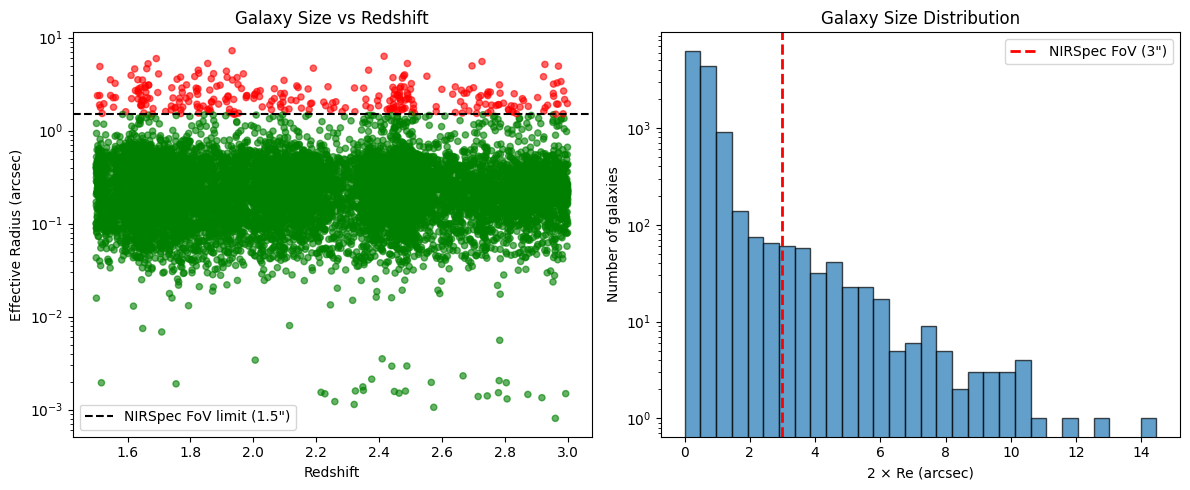


=== FINAL SAMPLE FOR PAIR SELECTION ===
Galaxies passing all criteria: 11848
Target pairs needed: 10 (20 galaxies)
Target control needed: 10 galaxies
Total target: 30 galaxies
✓ Sufficient galaxies available (11848 ≥ 30)


In [7]:
# Analyze NIRSpec IFU field of view constraint
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

# Define cosmology (Planck 2018)
cosmo = FlatLambdaCDM(H0=67.4, Om0=0.315)

# NIRSpec IFU specifications
nirspec_fov_arcsec = 3.0  # 3x3 arcsec field of view

print("=== NIRSpec IFU FIELD OF VIEW CONSTRAINT ===\n")

# Calculate angular size constraint for different redshifts
def check_fov_constraint(z, re_kpc, n_re=2):
    """Check if n_re effective radii fit within NIRSpec FoV"""
    # Convert effective radius from kpc to arcsec at redshift z
    angular_diameter_distance = cosmo.angular_diameter_distance(z).to(u.kpc).value
    re_arcsec = (re_kpc / angular_diameter_distance) * 206265  # conversion to arcsec
    
    # Check if 2*Re fits within 3 arcsec FoV
    diameter_needed = n_re * re_arcsec
    return diameter_needed <= nirspec_fov_arcsec, diameter_needed, re_arcsec

# Apply FoV constraint to valid galaxies
if len(valid_size) > 0:
    fov_results = []
    for idx, galaxy in valid_size.iterrows():
        fits_fov, diameter_needed, re_arcsec = check_fov_constraint(galaxy['z'], galaxy['Re_kpc'])
        fov_results.append({
            'id': galaxy['id'],
            'z': galaxy['z'], 
            'Re_kpc': galaxy['Re_kpc'],
            'Re_arcsec': re_arcsec,
            'diameter_needed': diameter_needed,
            'fits_fov': fits_fov
        })
    
    fov_df = pd.DataFrame(fov_results)
    
    # Summary statistics
    n_fits_fov = fov_df['fits_fov'].sum()
    print(f"Galaxies fitting NIRSpec FoV (2Re ≤ 3''): {n_fits_fov} / {len(fov_df)} ({n_fits_fov/len(fov_df)*100:.1f}%)")
    
    # Show size distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Effective radius in arcsec vs redshift
    colors = ['green' if fits else 'red' for fits in fov_df['fits_fov']]
    ax1.scatter(fov_df['z'], fov_df['Re_arcsec'], c=colors, alpha=0.6, s=20)
    ax1.axhline(y=1.5, color='black', linestyle='--', label='NIRSpec FoV limit (1.5")')
    ax1.set_xlabel('Redshift')
    ax1.set_ylabel('Effective Radius (arcsec)')
    ax1.set_title('Galaxy Size vs Redshift')
    ax1.legend()
    ax1.set_yscale('log')
    
    # Histogram of 2Re sizes
    ax2.hist(fov_df['diameter_needed'], bins=30, alpha=0.7, edgecolor='black')
    ax2.axvline(x=nirspec_fov_arcsec, color='red', linestyle='--', linewidth=2, label='NIRSpec FoV (3")')
    ax2.set_xlabel('2 × Re (arcsec)')
    ax2.set_ylabel('Number of galaxies')
    ax2.set_title('Galaxy Size Distribution')
    ax2.legend()
    ax2.set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    # Final sample after all constraints
    final_sample = fov_df[fov_df['fits_fov']]
    print(f"\n=== FINAL SAMPLE FOR PAIR SELECTION ===")
    print(f"Galaxies passing all criteria: {len(final_sample)}")
    print(f"Target pairs needed: 10 (20 galaxies)")
    print(f"Target control needed: 10 galaxies")
    print(f"Total target: 30 galaxies")
    
    if len(final_sample) >= 30:
        print(f"✓ Sufficient galaxies available ({len(final_sample)} ≥ 30)")
    else:
        print(f"⚠ May need to relax constraints ({len(final_sample)} < 30)")

## Selection Criteria Feasibility Analysis

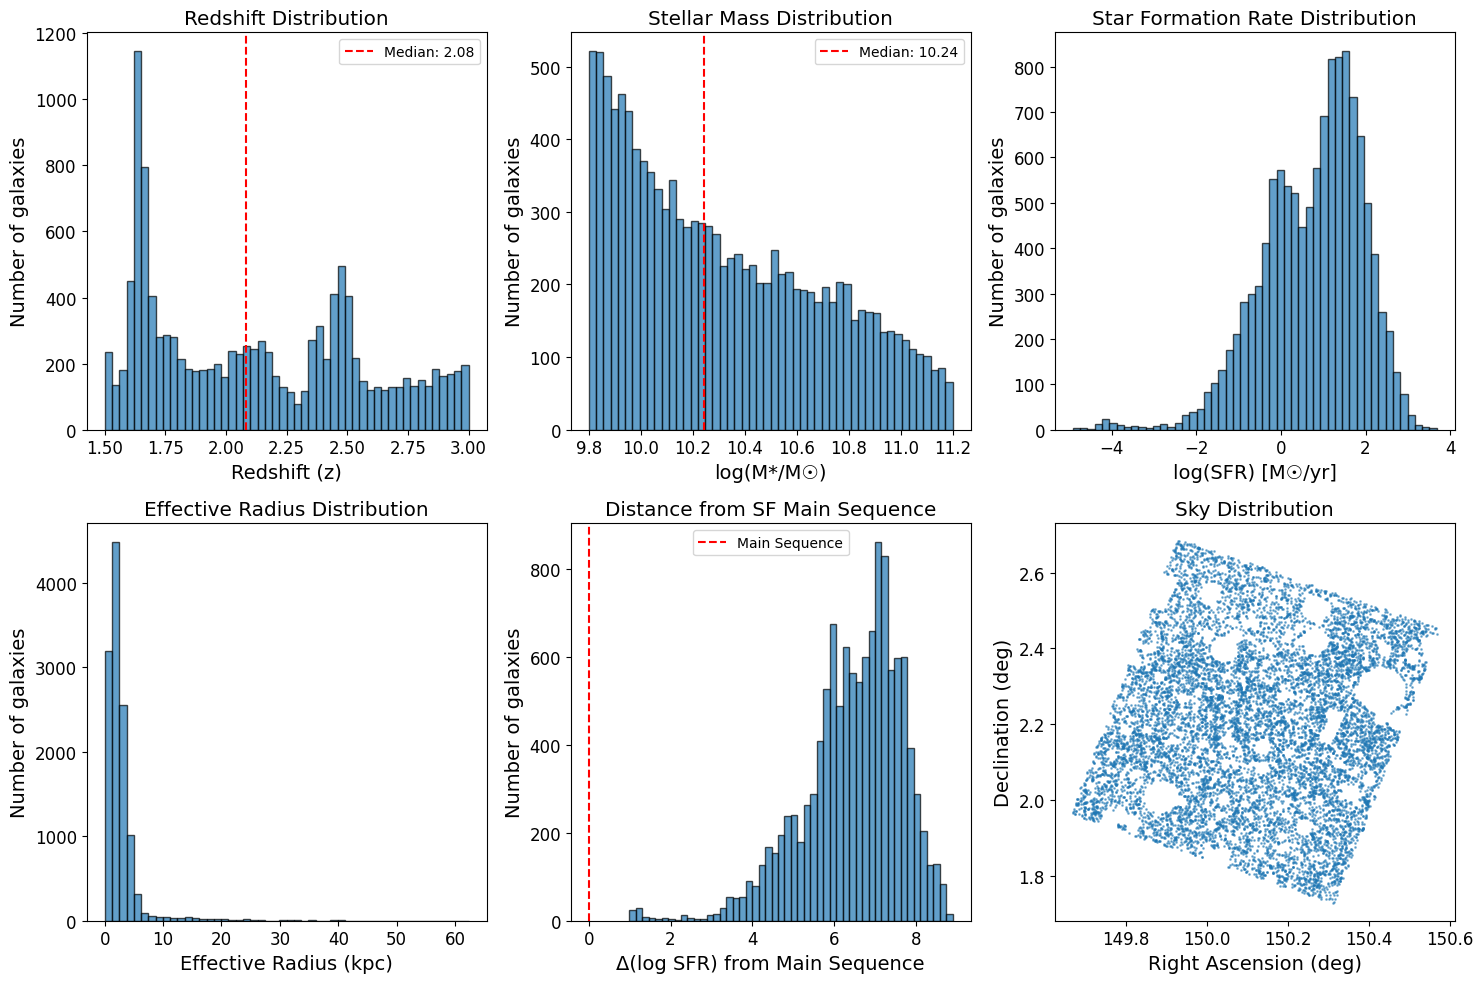

In [8]:
# Set up plotting style
plt.style.use('default')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 10

# Create comprehensive distribution plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# 1. Redshift distribution
axes[0].hist(selection_data['z'], bins=50, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Redshift (z)')
axes[0].set_ylabel('Number of galaxies')
axes[0].set_title('Redshift Distribution')
axes[0].axvline(selection_data['z'].median(), color='red', linestyle='--', label=f'Median: {selection_data["z"].median():.2f}')
axes[0].legend()

# 2. Stellar mass distribution
axes[1].hist(selection_data['logm'], bins=50, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('log(M*/M☉)')
axes[1].set_ylabel('Number of galaxies')
axes[1].set_title('Stellar Mass Distribution')
axes[1].axvline(selection_data['logm'].median(), color='red', linestyle='--', label=f'Median: {selection_data["logm"].median():.2f}')
axes[1].legend()

# 3. Star formation rate distribution
axes[2].hist(np.log10(selection_data['sfr']), bins=50, alpha=0.7, edgecolor='black')
axes[2].set_xlabel('log(SFR) [M☉/yr]')
axes[2].set_ylabel('Number of galaxies')
axes[2].set_title('Star Formation Rate Distribution')

# 4. Effective radius distribution
valid_re = selection_data['Re_kpc'].dropna()
if len(valid_re) > 0:
    axes[3].hist(valid_re, bins=50, alpha=0.7, edgecolor='black')
    axes[3].set_xlabel('Effective Radius (kpc)')
    axes[3].set_ylabel('Number of galaxies')
    axes[3].set_title('Effective Radius Distribution')
else:
    axes[3].text(0.5, 0.5, 'No valid Re_kpc data', ha='center', va='center', transform=axes[3].transAxes)
    axes[3].set_title('Effective Radius Distribution')

# 5. Distance from Main Sequence
axes[4].hist(selection_data['DeltaMS'], bins=50, alpha=0.7, edgecolor='black')
axes[4].set_xlabel('Δ(log SFR) from Main Sequence')
axes[4].set_ylabel('Number of galaxies')
axes[4].set_title('Distance from SF Main Sequence')
axes[4].axvline(0, color='red', linestyle='--', label='Main Sequence')
axes[4].legend()

# 6. Sky distribution
axes[5].scatter(selection_data['ra'], selection_data['dec'], s=1, alpha=0.5)
axes[5].set_xlabel('Right Ascension (deg)')
axes[5].set_ylabel('Declination (deg)')
axes[5].set_title('Sky Distribution')

plt.tight_layout()
plt.show()

## Key Distributions

In [9]:
# Check for missing values
print("Missing values per column:")
missing_values = selection_data.isnull().sum()
missing_percent = (missing_values / len(selection_data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

# Check data ranges for key variables
print("\n=== Key Variables Summary ===")
key_vars = ['z', 'logm', 'sfr', 'Re_kpc', 'logSFR', 'DeltaMS']
for var in key_vars:
    if var in selection_data.columns:
        print(f"{var}: min={selection_data[var].min():.3f}, max={selection_data[var].max():.3f}, median={selection_data[var].median():.3f}")

Missing values per column:
                 Missing Count  Missing Percentage
disk_f444w_mean            130            1.071811
irr_f444w_mean             130            1.071811

=== Key Variables Summary ===
z: min=1.500, max=3.000, median=2.084
logm: min=9.800, max=11.200, median=10.244
sfr: min=0.000, max=4811.783, median=9.108
Re_kpc: min=0.006, max=62.304, median=1.980
logSFR: min=-4.917, max=3.682, median=0.959
DeltaMS: min=0.990, max=8.900, median=6.657


## Data Quality Assessment